In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import libpysal as ps
import seaborn as sns

sns.set_theme(style="dark")

In [2]:
pth = ps.examples.get_path("columbus.shp")
tracts = gpd.GeoDataFrame.from_file(pth)
print('Observations, Attributes:',tracts.shape)
tracts.head()

Observations, Attributes: (49, 21)


,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,...,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
0,0.309441,2.440629,2,5,1,5,80.467003,19.531,15.725980,2.850747,...,5.03,38.799999,44.070000,1.0,1.0,1.0,0.0,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ..."
1,0.259329,2.236939,3,1,2,1,44.567001,21.232,18.801754,5.296720,...,4.27,35.619999,42.380001,1.0,1.0,0.0,0.0,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."
2,0.192468,2.187547,4,6,3,6,26.350000,15.956,30.626781,4.534649,...,3.89,39.820000,41.180000,1.0,1.0,1.0,0.0,1000.0,1006.0,"POLYGON ((8.65331 14.00809, 8.81814 14.00205, ..."
3,0.083841,1.427635,5,2,4,2,33.200001,4.477,32.387760,0.394427,...,3.70,36.500000,40.520000,1.0,1.0,0.0,0.0,1000.0,1002.0,"POLYGON ((8.45950 13.82035, 8.47341 13.83227, ..."
4,0.488888,2.997133,6,7,5,7,23.225000,11.252,50.731510,0.405664,...,2.83,40.009998,38.000000,1.0,1.0,1.0,0.0,1000.0,1007.0,"POLYGON ((8.68527 13.63952, 8.67758 13.72221, ..."


### On plote la variable CRIME

Cette variable indique en moyenne le nombre de crime pqr mille habitants de chaque région de Columbus

On peut prendre la colonne et en faire un histogramme comme suit :

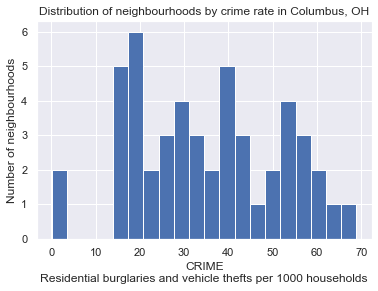

In [6]:
tracts['CRIME'].hist(bins=20)
plt.xlabel('CRIME\nResidential burglaries and vehicle thefts per 1000 households')
plt.ylabel('Number of neighbourhoods')
plt.title('Distribution of neighbourhoods by crime rate in Columbus, OH')
plt.show()

Ou bien en faisant une choropleth avec une map comme suit :
- sans utiliser mapclassify

<AxesSubplot:>

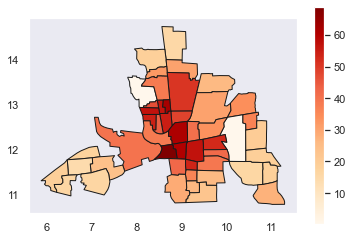

In [7]:
tracts.plot(column='CRIME', cmap='OrRd', edgecolor='k', legend=True)

- en utilisant mapclassify

<AxesSubplot:>

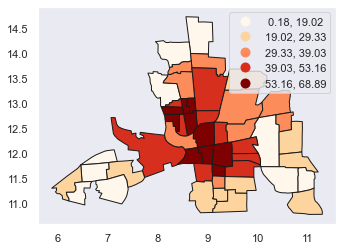

In [8]:
tracts.plot(column='CRIME', scheme='quantiles', k=5, cmap='OrRd', edgecolor='k', legend=True)

On peut utiliser les quantiles pour diviser la carte en deux (les 50% où y a le plus de crimes)

<AxesSubplot:>

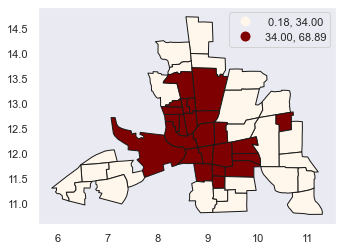

In [9]:
tracts.plot(column='CRIME', scheme='quantiles', k=2, cmap='OrRd', edgecolor='k', legend=True)

### Classification avec des intervalles egaux

<AxesSubplot:>

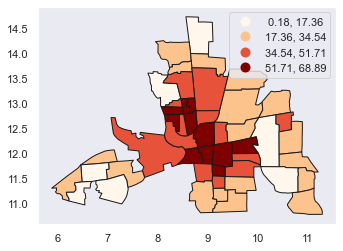

In [10]:
tracts.plot(column='CRIME', scheme='equal_interval', k=4, cmap='OrRd', edgecolor='k', legend=True)

### Classification "Natural breaks"

NATURAL BREAKS s'agit d'une sorte de schéma de classification "optimal" qui trouve les ruptures de classe qui minimiseront la variance intra-classe et maximiseront les différences entre les classes. Un inconvénient de cette approche est que chaque ensemble de données génère une solution de classification unique, et si vous avez besoin de faire des comparaisons entre les cartes, comme dans un atlas ou une série (par exemple, une carte pour 1980, 1990, 2000), vous voudrez peut-être utiliser un seul schéma qui peut être appliqué à toutes les cartes.

<AxesSubplot:>

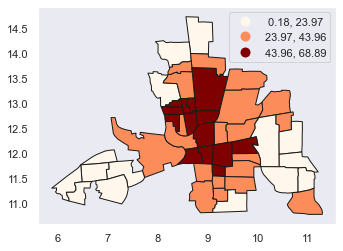

In [11]:
tracts.plot(column='CRIME', scheme='natural_breaks', k=3, cmap='OrRd', edgecolor='k', legend=True)